# Redshift Data of DESIJ0201-2739

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

In [5]:
data, header = fits.getdata("DESIJ1501+5208_F140W_drz_sci.fits", header=True)

In [6]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [7]:
FILENAME = "legacy_DESIJ1501+5208" #need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007664,8001592628000119,225.409408,52.134710,8001,592628,119,REX,0.302,R3,0.233,0.112,1,1
1,0.007153,8001592628000120,225.412517,52.136677,8001,592628,120,PSF,0.001,P3,1.007,0.222,1,1
2,0.007304,8001592628000130,225.399816,52.134868,8001,592628,130,PSF,0.184,P2,0.517,1.370,1,0
3,0.006128,8001592628000131,225.401354,52.135787,8001,592628,131,PSF,0.003,P3,1.117,0.290,1,1
4,0.006926,8001592628000170,225.414969,52.139660,8001,592628,170,EXP,0.002,E3,0.312,0.054,1,1


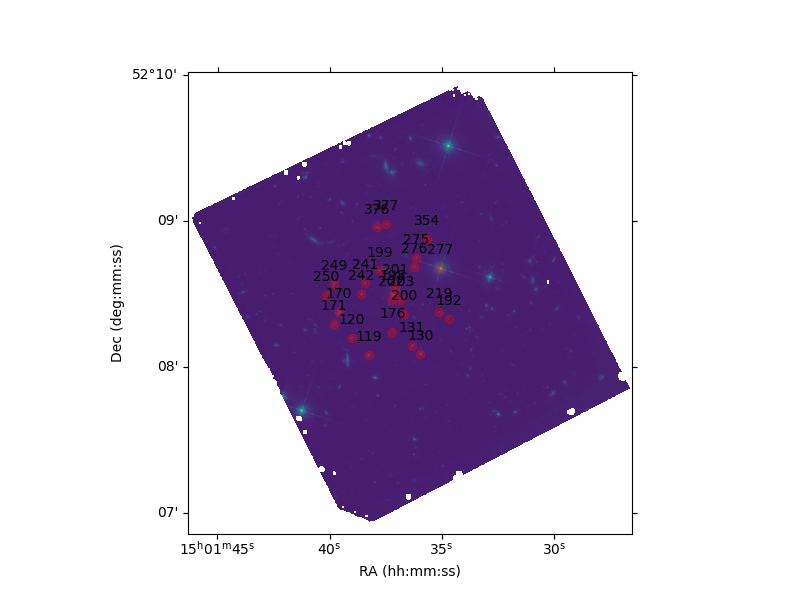

In [8]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

plt.show()

In [9]:
#In degrees
center_x, center_y = 225.4041667 , 52.1416667   # RA 15:01:37 DEC 52:08:30
radii = 20 # in arcsec
radii_deg = radii/3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg 
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

918.0162218272146 1224.8547312378057


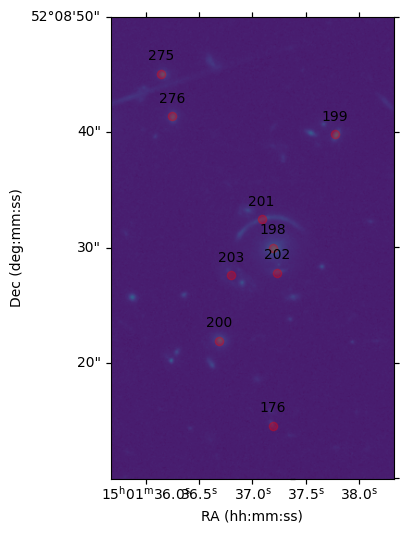

In [11]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

In [12]:
data_legacy.sort_values(by="objid")

object_ids = [198, # central deflector
            203, 202, 200, 199]

columns_to_drop = ['id', 'RAJ2000', 'DEJ2000', 'release', 'brickid']  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[data_legacy_dropped['objid'].isin(object_ids)]
selected_data_legacy.set_index('objid', inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
198    0.000487  DEV  0.007      D6  0.752    0.073       0      0
200    0.002384  REX  0.001      R6  0.971    0.113       1      1
202    0.000852  REX  0.971      R5  1.039    0.351       0      0
199    0.003372  REX  0.019      R4  0.903    0.100       1      1
203    0.000840  REX  0.041      R9  0.178    0.141       0      0
